Para reunion martes 1 dic

In [19]:
using Posets
using DelimitedFiles
import LinearAlgebra: norm
using Plots
using Statistics: mean
using Colors

funciones

In [20]:
function norma_diferenciapos(lista1, lista2, n)
    pos1 = [posicionpromedio(lista1, x) for x in 1:n]
    pos2 = [posicionpromedio(lista2, x) for x in 1:n]
    norm(pos1-pos2)
end

norma_diferenciapos (generic function with 1 method)

In [21]:
"""
```
ruido(ll, mm, nn)
```
ll: lista de rankings
mm: numero de rankings (de la lista) a perturbar
nn: numero de transposiciones adyacentes aleatorias por ranking
"""
function ruido(ll, mm, nn)

    cc = deepcopy(ll)
    n = ll[1] |> length
    m = length(ll)
    for i in rand(1:m, mm)
        for pasos in 1:nn
            q = rand(1:n-1)
            tmp = cc[i][q]
            cc[i][q] = cc[i][q+1]
            cc[i][q+1] = tmp
        end
    end
    cc
end

ruido

# Introduccion

El experimento que se hace aqui es de la siguiente forma
1. Se obtiene un poset aleatorio P
2. Se calcula una serie de extensiones lineales (EL) aleatorias de P
3. Con estas EL se calculan las puntucaciones
4. Con las puntuaciones, se calculan los cortes $\alpha$
5. Con los cortes $\alpha$ se calculan nuevas ELs
6. Con estas ELs se obtiene la norma entre el vector de posiciones promedio

In [37]:
posetrandom = Array( caminata_poset(10,10^2) )

10×10 Array{Int64,2}:
 0  0  0  1  0  0  0  1  0  0
 0  0  0  0  0  1  0  0  1  1
 1  0  0  0  0  1  0  1  0  1
 0  0  0  0  1  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  1
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  0  0  0

In [138]:
#writedlm("poset_original.dat", posetrandom)

In [22]:
posetrandom = readdlm("poset_original.dat",Int);

In [23]:
lista_extensioneslineales = [caminatale(posetrandom, 10^2) for _ in 1:10^3]|>unique!;

Se calcula una lista de extensiones lineales

In [26]:
puntuaciones_preposet = mn(lista_extensioneslineales)
poset_mn_old = puntuaciones_preposet |> fuzzy
poset_a0p90 = αcut_poset(poset_mn_old, 0.90)

10×10 Array{Int64,2}:
 0  0  0  0  0  0  1  0  1  0
 1  0  0  1  0  0  1  0  1  0
 1  1  0  1  0  0  1  0  1  0
 0  0  0  0  0  0  1  0  1  0
 1  1  0  1  0  0  1  0  1  0
 1  1  0  1  1  0  1  0  1  0
 0  0  0  0  0  0  0  0  1  0
 1  1  0  1  0  0  1  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  0  1  0  1  0

In [27]:
puntuaciones_preposet = mn(lista_extensioneslineales)
poset_mn_old = puntuaciones_preposet |> fuzzy
poset_a0p95 = αcut_poset(poset_mn_old, 0.95)

10×10 Array{Int64,2}:
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  1  0  1  0
 1  1  0  1  0  0  1  0  1  0
 0  0  0  0  0  0  0  0  1  0
 1  1  0  1  0  0  1  0  1  0
 1  1  0  1  1  0  1  0  1  0
 0  0  0  0  0  0  0  0  1  0
 1  1  0  1  0  0  1  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  0  1  0  1  0

In [28]:
puntuaciones_preposet = mn(lista_extensioneslineales)
poset_mn_old = puntuaciones_preposet |> fuzzy
poset_a0p98 = αcut_poset(poset_mn_old, 0.98)

10×10 Array{Int64,2}:
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  1  0  1  0
 0  1  0  1  0  0  1  0  1  0
 0  0  0  0  0  0  0  0  1  0
 1  1  0  1  0  0  1  0  1  0
 1  1  0  1  1  0  1  0  1  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  1  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  1  1  1  0  0  1  0  1  0

In [29]:
lista_extensioneslineales_0p90 = [caminatale(poset_a0p90, 10^2) for _ in 1:10^3]|>unique!;

In [30]:
lista_extensioneslineales_0p95 = [caminatale(poset_a0p95, 10^2) for _ in 1:10^3]|>unique!;

In [31]:
lista_extensioneslineales_0p98 = [caminatale(poset_a0p98, 10^2) for _ in 1:10^3]|>unique!;

#### Un ejemplo para ver que funciona

Aqui deberian de ir las extensiones lineales del poset original

In [13]:
ruido_v1= ruido(lista_extensioneslineales, 2, 5) |> unique!

61-element Array{Array{Int64,1},1}:
 [8, 10, 6, 5, 3, 2, 4, 7, 9, 1]
 [10, 8, 6, 5, 3, 1, 2, 7, 4, 9]
 [10, 8, 6, 5, 1, 3, 2, 7, 4, 9]
 [10, 8, 6, 5, 3, 2, 4, 7, 1, 9]
 [8, 10, 6, 5, 3, 4, 2, 7, 1, 9]
 [10, 6, 8, 5, 3, 4, 2, 7, 1, 9]
 [10, 3, 6, 5, 8, 4, 2, 1, 7, 9]
 [10, 8, 6, 3, 5, 4, 2, 7, 1, 9]
 [10, 8, 6, 5, 3, 4, 2, 1, 7, 9]
 [10, 3, 6, 8, 5, 2, 4, 7, 1, 9]
 [6, 8, 10, 5, 3, 4, 2, 7, 1, 9]
 [8, 6, 5, 10, 1, 3, 2, 7, 4, 9]
 [10, 3, 6, 5, 2, 1, 7, 8, 4, 9]
 ⋮
 [10, 3, 8, 6, 5, 2, 1, 4, 9, 7]
 [6, 8, 5, 10, 3, 4, 2, 1, 7, 9]
 [10, 3, 6, 5, 1, 8, 2, 7, 4, 9]
 [10, 3, 6, 5, 2, 1, 8, 9, 4, 7]
 [6, 8, 10, 5, 3, 2, 4, 7, 1, 9]
 [10, 3, 2, 6, 8, 5, 4, 7, 1, 9]
 [10, 8, 6, 3, 5, 1, 2, 7, 4, 9]
 [8, 10, 3, 6, 2, 5, 1, 9, 4, 7]
 [6, 8, 10, 5, 3, 1, 4, 2, 7, 9]
 [10, 6, 8, 5, 3, 1, 2, 7, 4, 9]
 [10, 8, 6, 3, 2, 5, 1, 7, 4, 9]
 [10, 8, 6, 3, 2, 5, 4, 1, 9, 7]

In [17]:
puntuacionespreposet_ruidov1 = mn(lista_extensioneslineales)
poset_mn_old = puntuacionespreposet_ruidov1 |> fuzzy

10×10 Array{Float64,2}:
 1.0       0.777953  0.449556  0.826791  …  0.313414  1.0       0.173498
 0.921828  1.0       0.545876  0.938539     0.368794  1.0       0.205585
 0.975859  1.0       1.0       1.0          0.514206  1.0       0.376614
 0.850553  0.814819  0.473918  1.0          0.333442  0.989343  0.178484
 1.0       0.960951  0.692308  1.0          0.523335  1.0       0.304712
 1.0       0.991511  0.833179  1.0       …  0.716348  1.0       0.448517
 0.831824  0.749899  0.409352  0.832425     0.286617  0.976909  0.154168
 0.966949  0.960223  0.730835  1.0          1.0       1.0       0.439292
 0.755089  0.637238  0.347853  0.726172     0.244745  1.0       0.131006
 1.0       1.0       1.0       1.0          0.82068   1.0       1.0

In [20]:
poset_a0p95 = αcut_poset(poset_mn_old, 0.95)

10×10 Array{Int64,2}:
 0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  1  0  1  0
 1  1  0  1  0  0  1  0  1  0
 0  0  0  0  0  0  1  0  1  0
 1  1  0  1  0  0  1  0  1  0
 1  1  0  1  1  0  1  0  1  0
 0  0  0  0  0  0  0  0  1  0
 1  1  0  1  0  0  1  0  1  0
 0  0  0  0  0  0  0  0  0  0
 1  1  1  1  0  0  1  0  1  0

## EL poset vs ruido + EL poset

Se le aplica el ruido a las EL del poset elegido aleatoriamente

In [32]:
white_matrix = zeros(Float64, 20,20);#Array{RGB{Float64},2}(undef, 20, 20);

In [33]:
for i in 1:20, j in 1:20
 white_matrix[i,j] =mean([
            norma_diferenciapos(
                lista_extensioneslineales, (ruido(lista_extensioneslineales, i,j) |> unique!)
                ,10) for _ in 1:10^2])
end

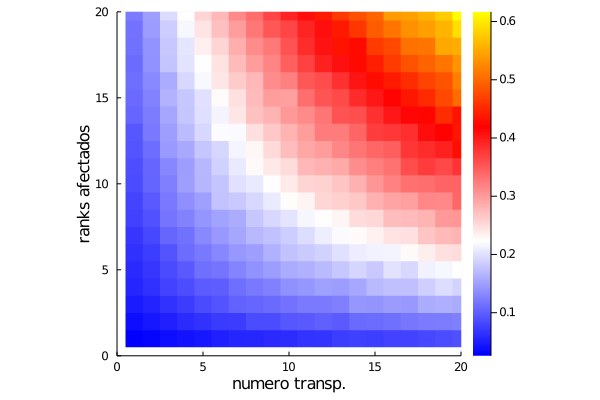

In [34]:
#gr()
#white_matrix = rand(21,100)
heatmap(1:size(white_matrix,1),
    1:size(white_matrix,2), white_matrix,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,20),ylim=(0,20))

## EL poset vs  ruido + EL poset $\alpha = 0.9$

In [35]:
white_matrix = zeros(Float64, 20,20);#Array{RGB{Float64},2}(undef, 20, 20);

In [36]:
for i in 1:20, j in 1:20
 white_matrix[i,j] =mean([
            norma_diferenciapos(
                lista_extensioneslineales, (ruido(lista_extensioneslineales_0p90, i,j) |> unique!)
                ,10) for _ in 1:10^2])
end

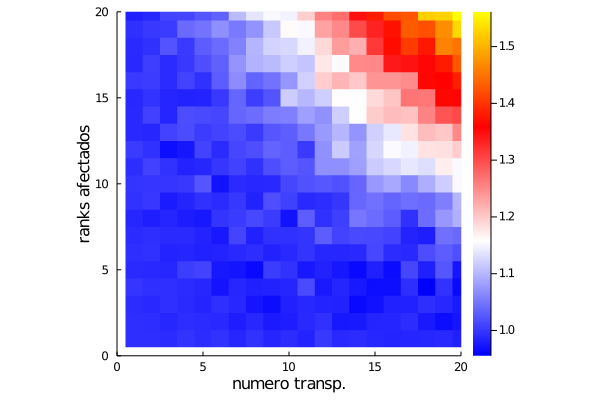

In [37]:
#gr()
#white_matrix = rand(21,100)
heatmap(1:size(white_matrix,1),
    1:size(white_matrix,2), white_matrix,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,20),ylim=(0,20))

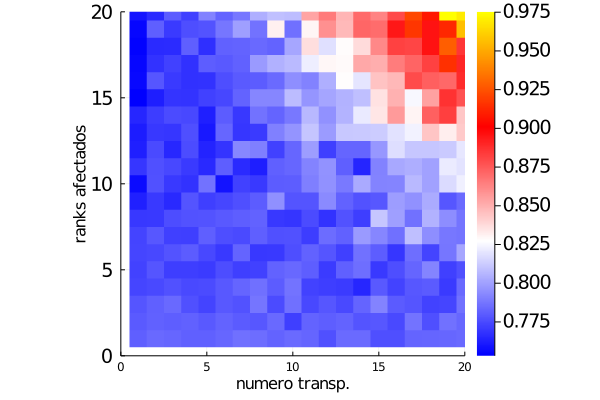

In [45]:
#gr()
#white_matrix = rand(21,100)
heatmap(1:size(white_matrix,1),
    1:size(white_matrix,2), white_matrix,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,20),ylim=(0,20),ytickfontsize=13)

## EL poset vs  ruido + EL poset $\alpha = 0.95$

In [38]:
white_matrix = zeros(Float64, 20,20);#Array{RGB{Float64},2}(undef, 20, 20);

In [39]:
for i in 1:20, j in 1:20
 white_matrix[i,j] =mean([
            norma_diferenciapos(
                lista_extensioneslineales, (ruido(lista_extensioneslineales_0p95, i,j) |> unique!)
                ,10) for _ in 1:10^2])
end

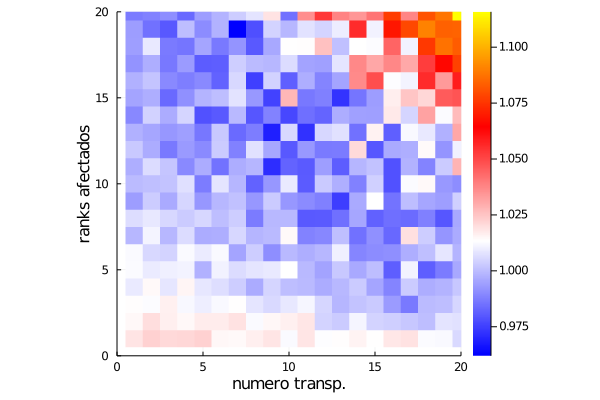

In [40]:
#gr()
#white_matrix = rand(21,100)
heatmap(1:size(white_matrix,1),
    1:size(white_matrix,2), white_matrix,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,20),ylim=(0,20))

## EL poset vs  ruido + EL poset $\alpha = 0.98$

### EL poset vs  ruido + EL poset $\alpha = 0.98$

In [41]:
white_matrix = zeros(Float64, 20,20);#Array{RGB{Float64},2}(undef, 20, 20);

In [42]:
for i in 1:20, j in 1:20
 white_matrix[i,j] =mean([
            norma_diferenciapos(
                lista_extensioneslineales, (ruido(lista_extensioneslineales_0p98, i,j) |> unique!)
                ,10) for _ in 1:10^2])
end

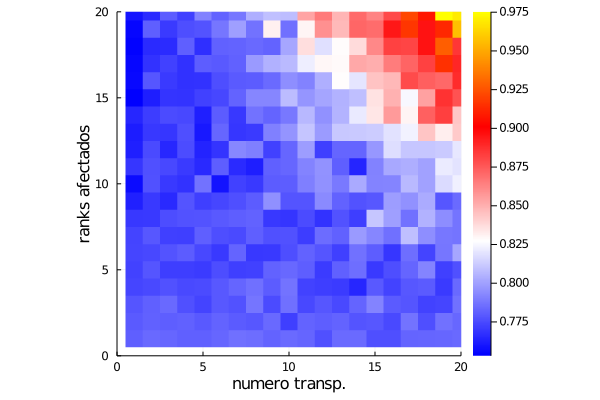

In [43]:
#gr()
#white_matrix = rand(21,100)
heatmap(1:size(white_matrix,1),
    1:size(white_matrix,2), white_matrix,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    #title="My title",
    aspect_ratio=:equal,
    xlim=(0,20),ylim=(0,20))

### EL poset vs  ruido + EL poset $\alpha = 0.98$

In [52]:
white_matrix = zeros(Float64, 30,30);#Array{RGB{Float64},2}(undef, 30, 30);

In [53]:
for i in 1:30, j in 1:30
 white_matrix[i,j] =mean([
            norma_diferenciapos(
                lista_extensioneslineales, (ruido(lista_extensioneslineales_0p98, i,j) |> unique!)
                ,10) for _ in 1:10^2])
end

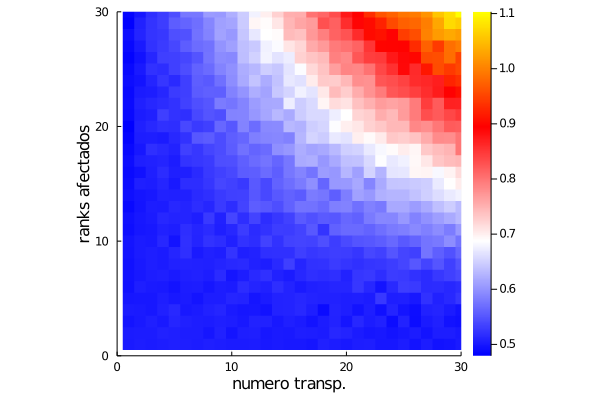

In [54]:
#gr()
#white_matrix = rand(21,100)
heatmap(1:size(white_matrix,1),
    1:size(white_matrix,2), white_matrix,
    c=cgrad([:blue, :white,:red, :yellow]),
    xlabel="numero transp.", ylabel="ranks afectados",
    aspect_ratio=:equal,
    xlim=(0,30),ylim=(0,30))